# CIFAR-10 영상 분류기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# CFAR-10 데이터 세트를 적재한다.
# 훈련 세트와 테스트 세트를 반환받는다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


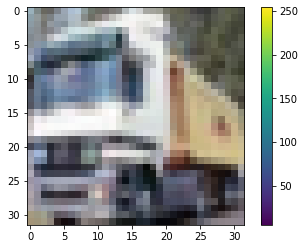

In [ ]:
# 두 번째 영상(트럭)을 화면에 표시한다. 
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# 영상의 픽셀 값을 0에서 1 사이로 변환한다. 
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# 순차 모델을 구축한다. 
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten(input_shape = (32, 32, 3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# 모델을 컴파일한다. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# 모델을 훈련한다. 
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 17s 5ms/step - loss: 1.4854 - accuracy: 0.4608 - val_loss: 1.2438 - val_accuracy: 0.5591
Epoch 2/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.1568 - accuracy: 0.5889 - val_loss: 1.1252 - val_accuracy: 0.6096
Epoch 3/10
1094/1094 [==============================] - 5s 5ms/step - loss: 1.0087 - accuracy: 0.6437 - val_loss: 1.0593 - val_accuracy: 0.6312
Epoch 4/10
1094/1094 [==============================] - 7s 7ms/step - loss: 0.9034 - accuracy: 0.6817 - val_loss: 1.0656 - val_accuracy: 0.6329
Epoch 5/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.8029 - accuracy: 0.7155 - val_loss: 1.0265 - val_accuracy: 0.6523
Epoch 6/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.7159 - accuracy: 0.7475 - val_loss: 1.0121 - val_accuracy: 0.6578
Epoch 7/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.6237 - accuracy: 0.7801 - val_loss: 1.1095 - val_accuracy

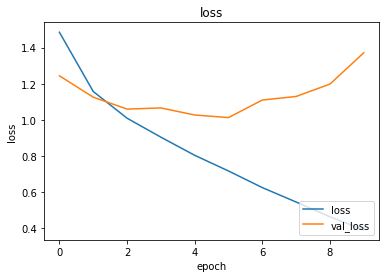

In [ ]:
# 손실값을 그래프로 그린다. 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

정답= [7]
예측값= [5.7333565e-09 8.4101030e-06 5.0675797e-09 2.5404773e-08 7.7155864e-06
 3.8511254e-05 1.5274305e-06 9.9994302e-01 1.5008262e-11 6.8919076e-07]


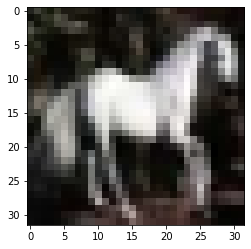

In [ ]:
plt.figure()
plt.imshow(X_test[13])
y_pred = model.predict(X_test)
print("정답=", y_test[13])
print("예측값=", y_pred[13])

# 데이터증대

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image = load_img("/content/gdrive/MyDrive/딥러닝 특론 수업/data/dog.jpg")
array = img_to_array(image)
sample = expand_dims(array, axis=0)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,
    rotation_range=90, brightness_range=[0.8, 1.0],
    width_shift_range=0.2, zoom_range=[0.8, 1.2],
    height_shift_range=0.2)

In [ ]:
obj = datagen.flow(sample, batch_size=1)

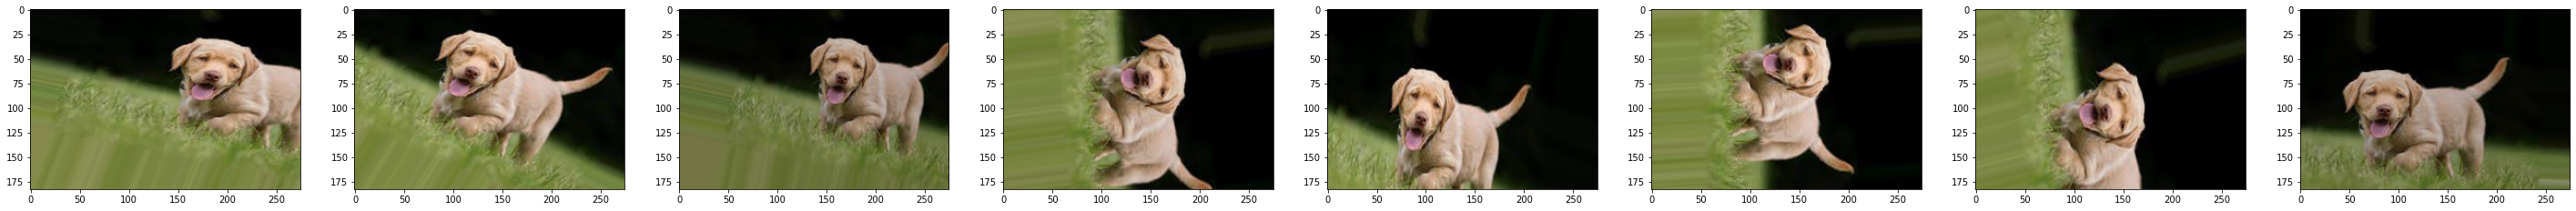

In [ ]:
obj = datagen.flow(sample, batch_size=1)
fig = plt.figure(figsize=(50,20))

for i in range(8):
	plt.subplot(1,8,i+1)
	image = obj.next()
	plt.imshow(image[0])

# 강아지와 고양이 구별하기

In [21]:
import os
import zipfile
import random
from shutil import copyfile
import random

In [14]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

!unzip -q kagglecatsanddogs_5340.zip
!ls
!ls Petimages

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   157M      0  0:00:04  0:00:04 --:--:--  169M
 CDLA-Permissive-2.0.pdf   kagglecatsanddogs_5340.zip  'readme[1].txt'
 gdrive			   PetImages		        sample_data
ls: cannot access 'Petimages': No such file or directory


In [16]:
try:
    os.mkdir('./Petimages')
    os.mkdir('./Petimages/train')
    os.mkdir('./Petimages/test')
    os.mkdir('./Petimages/train/cat')
    os.mkdir('./Petimages/train/dog')
    os.mkdir('./Petimages/test/cat')
    os.mkdir('./Petimages/test/dog')
except OSError:    
    pass

In [17]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

In [22]:
CAT_SOURCE_DIR = "./PetImages/Cat/"
TRAINING_CATS_DIR = "./Petimages/train/cat/"
TESTING_CATS_DIR = "./Petimages/test/cat/"
DOG_SOURCE_DIR = "./PetImages/Dog/"
TRAINING_DOGS_DIR = "./Petimages/train/dog/"
TESTING_DOGS_DIR = "./Petimages/test/dog/"
split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


### 이미지 출력

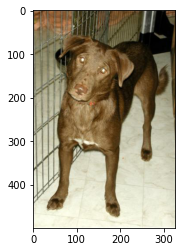

In [24]:
from matplotlib import pyplot
from matplotlib.image import imread
image = imread('/content/Petimages/train/dog/1.jpg')
pyplot.imshow(image)
pyplot.show()

### 신경망 모델 생성

In [32]:
from tensorflow.keras import models, layers

train_dir = './Petimages/train'
test_dir = './Petimages/test'

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


### 이미지 전처리

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
  zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                      
    target_size=(128, 128), 
    batch_size=20,
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode = 'binary')

Found 22499 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


In [34]:
history = model.fit_generator(
    train_generator, steps_per_epoch = 100, epochs=10, 
    validation_data=test_generator, validation_steps=5)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


100/100 [==============================] - 13s 129ms/step - loss: 0.9353 - accuracy: 0.5523 - val_loss: 0.7581 - val_accuracy: 0.4800
Epoch 2/10
100/100 [==============================] - 13s 127ms/step - loss: 0.6678 - accuracy: 0.6020 - val_loss: 0.6651 - val_accuracy: 0.5800
Epoch 3/10
100/100 [==============================] - 13s 130ms/step - loss: 0.6419 - accuracy: 0.6405 - val_loss: 0.6210 - val_accuracy: 0.6500
Epoch 4/10
100/100 [==============================] - 13s 129ms/step - loss: 0.6486 - accuracy: 0.6385 - val_loss: 0.6448 - val_accuracy: 0.6600
Epoch 5/10
100/100 [==============================] - 13s 126ms/step - loss: 0.6193 - accuracy: 0.6705 - val_loss: 0.6431 - val_accuracy: 0.6400
Epoch 6/10
100/100 [==============================] - 13s 129ms/step - loss: 0.6297 - accuracy: 0.6528 - val_loss: 0.6195 - val_accuracy: 0.6600
Epoch 7/10
100/100 [==============================] - 13s 125ms/step - loss: 0.6045 - accuracy: 0.6800 - val_loss: 0.6237 - val_accuracy: 0.6

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

100/100 [==============================] - 13s 125ms/step - loss: 0.6105 - accuracy: 0.6730 - val_loss: 0.6321 - val_accuracy: 0.6500
Epoch 9/10
100/100 [==============================] - 13s 126ms/step - loss: 0.5812 - accuracy: 0.6903 - val_loss: 0.5643 - val_accuracy: 0.7100
Epoch 10/10
100/100 [==============================] - 13s 126ms/step - loss: 0.5794 - accuracy: 0.6928 - val_loss: 0.4797 - val_accuracy: 0.7600


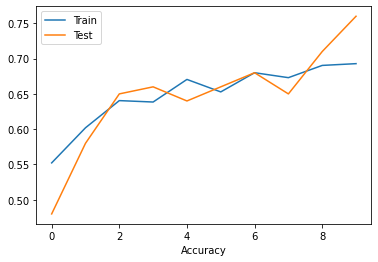

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 가중치 저장과 복원

In [36]:
import numpy as np
import tensorflow as tf

# 난수로 훈련 예제를 만든다. 
test_input = np.random.random((128, 32))
test_target = np.random.random((128, 1))

# 입력이 32, 출력이 1 노드인 신경망 모델을 구축한다. 함수형 API를 사용하였다. 
inputs = tf.keras.Input(shape=(32,))
outputs = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# 신경망을 3번 훈련시킨다.
model.fit(test_input, test_target, epochs=3)

# 3의 에포크를 수행한 모델을 저장한다. 
model.save("my_model")

Epoch 1/3
4/4 [==============================] - 0s 3ms/step - loss: 0.3050
Epoch 2/3
4/4 [==============================] - 0s 3ms/step - loss: 0.2730
Epoch 3/3
4/4 [==============================] - 0s 3ms/step - loss: 0.2515
INFO:tensorflow:Assets written to: my_model/assets


In [37]:
# 저장된 모델을 불러온다. 
saved_model = tf.keras.models.load_model("my_model")

# 저장된 모델을 다시 학습시킨다. 
saved_model.fit(test_input, test_target, epochs=3)

Epoch 1/3
4/4 [==============================] - 0s 3ms/step - loss: 0.2377
Epoch 2/3
4/4 [==============================] - 0s 3ms/step - loss: 0.2297
Epoch 3/3
4/4 [==============================] - 0s 3ms/step - loss: 0.2270


# 전이학습

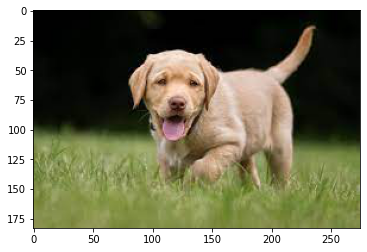

In [43]:
from matplotlib import pyplot
from matplotlib.image import imread
image = imread('/content/gdrive/MyDrive/딥러닝 특론 수업/data/dog.jpg')
pyplot.imshow(image)
pyplot.show()

In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/gdrive/MyDrive/딥러닝 특론 수업/data/dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))	# 영상 크기를 변경하고 적재한다.
x = image.img_to_array(img)	# 영상을 넘파이 배열로 변환한다. 
x = np.expand_dims(x, axis=0)	# 차원을 하나 늘인다. 배치 크기가 필요하다. 
x = preprocess_input(x)	# ResNet50이 요구하는 전처리를 한다. 

preds = model.predict(x)
print('예측:', decode_predictions(preds, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
예측: [('n02099712', 'Labrador_retriever', 0.5555074), ('n02099849', 'Chesapeake_Bay_retriever', 0.27714446), ('n02092339', 'Weimaraner', 0.03215363)]


# 예제 : 사전 훈련된 모델을 특징 추출기 전처리기로 사용

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [41]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(2,activation='softmax')(x) 

model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

17235968/17225924 [==============================] - 1s 0us/step


In [44]:
layer.trainable

True

In [42]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 

train_generator=train_datagen.flow_from_directory('./Petimages/', 
                                                 target_size=(128,128),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Found 24998 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


507/781 [==================>...........] - ETA: 31s - loss: 0.3619 - accuracy: 0.8989

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

781/781 [==============================] - 92s 114ms/step - loss: 0.3497 - accuracy: 0.8999
Epoch 2/5
781/781 [==============================] - 88s 113ms/step - loss: 0.3312 - accuracy: 0.9000
Epoch 3/5
781/781 [==============================] - 86s 110ms/step - loss: 0.3264 - accuracy: 0.8999
Epoch 4/5
781/781 [==============================] - 85s 109ms/step - loss: 0.3249 - accuracy: 0.9001
Epoch 5/5
781/781 [==============================] - 86s 110ms/step - loss: 0.3229 - accuracy: 0.9000
